write an algorithm to determine is "happy"

a number is happy if the **sum of the square of the digits** ever equals one

An example of a happy number is 19: 

1^2 + 9^2 = 82 8^2 + 2^2 = 68 6^2 + 8^2 = 100 1^2 + 0^2 + 0^2 = 1 

If it is not happy then it will eventually hit repeat back to a number that it already saw

In [82]:
from collections import Counter
from functools import lru_cache

import networkx as nx
import pylab as plt

In [257]:
ops = Counter()

network = {}

def sq(s):
    ops['squared'] += 1
    return int(s)**2

def squared_digit_sum(n):
    ops['squared_digit_sum'] += 1
    return sum((1 if d=='1' else sq(d)) for d in str(n))

def can(n):
    return ''.join(sorted(str(n))).replace('0', '')

def gen_sds(n):
    while True:
        yield (n:= can(squared_digit_sum(n)))
        
def sds_target(n):
    canonical = can(n)
    
    if canonical in network:
        return network[canonical], -1, network
    
    prev = canonical

    for i, total in enumerate(gen_sds(n), 1):
        if i > 20:
            raise RuntimeError
        
        network[prev] = total
        if total in network:
            return total
        
        prev = total


targets = Counter()

start = 1
stop = 250000
for n in range(start, stop):
    sds_target(n)
    
print(ops)

print(f'sub graphs sizes, with input from {start} to {stop}')
sub_graphs = nx.connected_components(nx.DiGraph(iter(network.items())).to_undirected())
for sub in sub_graphs:
    print(len(sub))

Counter({'squared': 17724, 'squared_digit_sum': 3954})
sub graphs sizes, with input from 1 to 250000
549
3405


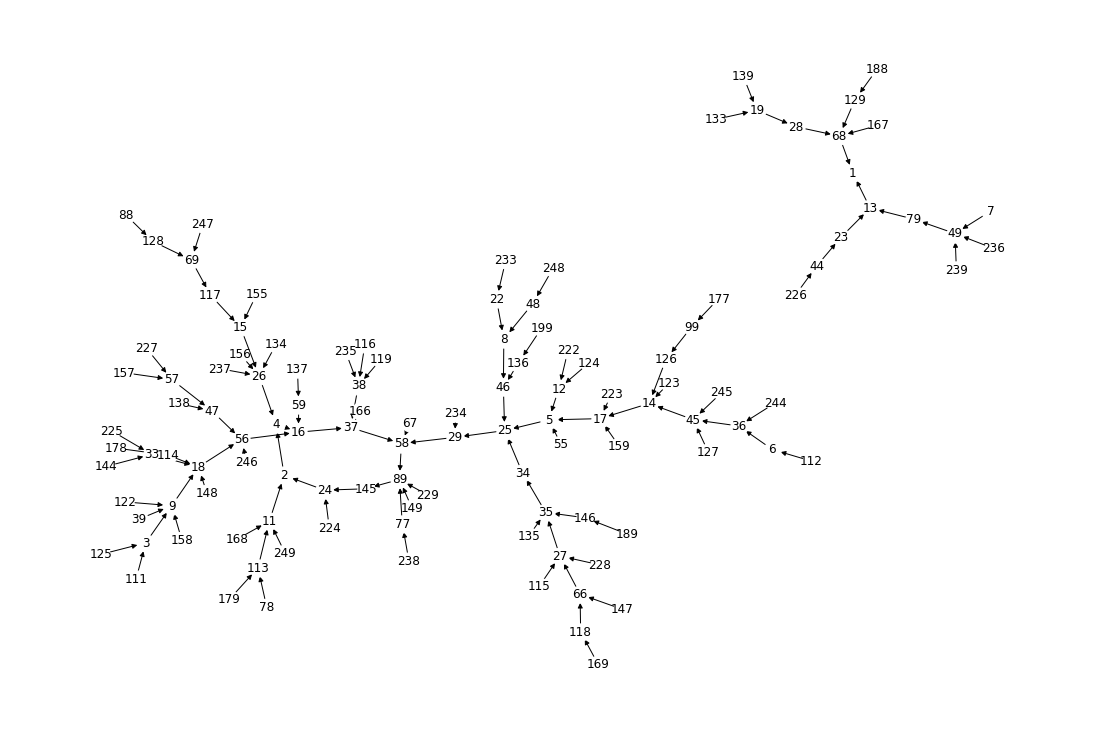

In [250]:
plt.figure(1, figsize=(15, 10)) 

G = nx.MultiDiGraph(iter(network.items()))

nx.draw(G, arrows=True, with_labels=True, node_color='white', pos=nx.nx_agraph.graphviz_layout(G))

In [106]:
cc = nx.connected_components(G.to_undirected())
print(len(list(cc)))

2


In [115]:
i = {1:2}.items()
dir(i.__iter__())

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']